# Importing libraries

In [1]:
import pandas as pd                # pandas is a data frame library
import matplotlib.pyplot as plt    # matplotlib.pyplot is used to plot data
import numpy as np                 # numpy provides N-dim object support
#do ploting inline instead of ploting in seperate window
%matplotlib inline

## Load and review data

In [2]:
pf = pd.read_csv("C:/Users/Sanju/Documents/Python Scripts/Untitled Folder/data/pima-data.csv")

In [3]:
pf.head(5)


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
pf.shape



(768, 10)

## Null values 

In [5]:
pf.isnull().values.any()

False

In [6]:
def plot_corr(pf,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        pf: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = pf.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    

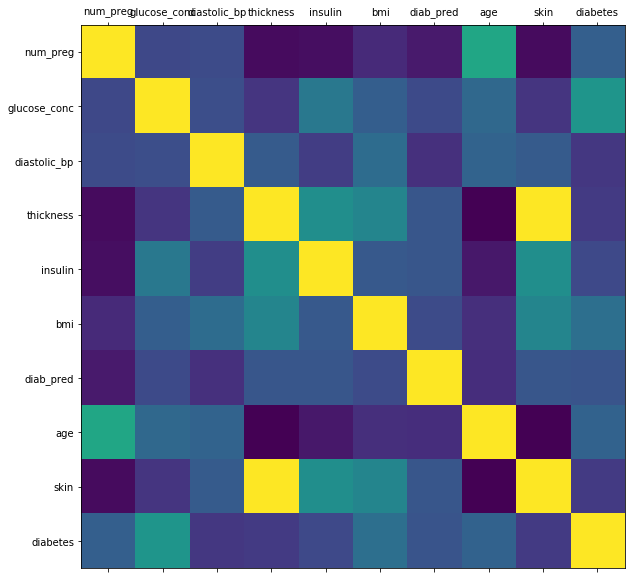

In [7]:
plot_corr(pf) #identification of correlated features

In [8]:
pf.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [9]:
del pf['skin'] #deleted the "skin" column which is highly correlated with the "thickness" which may create ambiguity to the model

In [3]:
pf.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


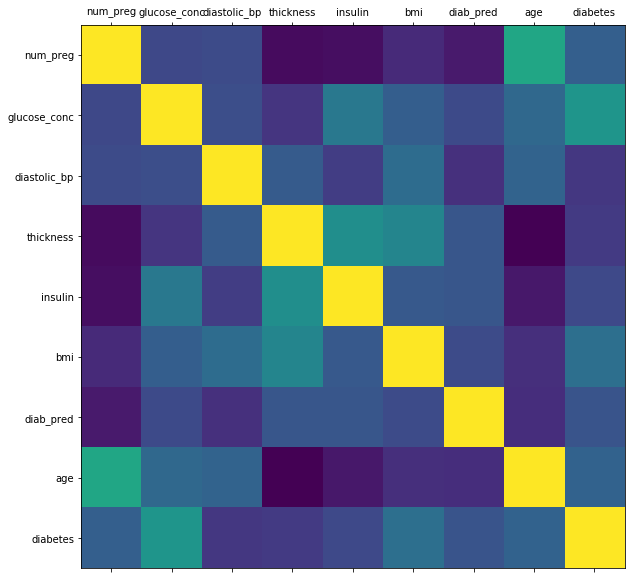

In [11]:
plot_corr(pf)

## Molding the data to set to the algorithm

True to 1 and False to 0

In [12]:
diabetes_map = {True : 1, False : 0}

In [13]:
pf['diabetes'] = pf['diabetes'].map(diabetes_map)

In [14]:
pf.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Lets check wheather its true/false ratio is good enough for this method

In [15]:
num_true = len(pf.loc[pf['diabetes'] == True])
num_false = len(pf.loc[pf['diabetes'] == False])
print("Total number of times 'Trues' are: {0} and the percentange {1:2.2f}%".format(num_true, (num_true/(num_true + num_false)) * 100))
print("Total number of times 'Falses' are: {0} and the percentage {1:2.2f}%".format(num_false, (num_false/(num_false+num_true)) * 100))


Total number of times 'Trues' are: 268 and the percentange 34.90%
Total number of times 'Falses' are: 500 and the percentage 65.10%


The ratio is suitable to train, so next work to be done.


## Spliting the data for training and testing

In [16]:
from sklearn.cross_validation import train_test_split
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

x = pf[feature_col_names].values # predictor feature columns (8 x m)
y = pf[predicted_class_names].values # predicted class column (1 x m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = split_test_size, random_state= 42)
# test_size = 0.3 is 30% and random_number = 42 is everything

C:\Users\Sanju\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
print("Train data is {0:0.2f}%".format((len(x_train)/len(pf.index)) * 100))
print("Test data is {0:0.2f}%".format((len(x_test)/len(pf.index)) * 100))

Train data is 69.92%
Test data is 30.08%


The split is succesful for feature columns numpy arrays

### Now verifying the predicted class wheather it split correctly

In [18]:
print("Original True: {0} & {1:0.2f}%".format(len(pf.loc[pf['diabetes'] == 1]), (len(pf.loc[pf['diabetes'] == 1]) / len(pf.index)) * 100))
print("Original False: {0} & {1:0.2f}%".format(len(pf.loc[pf['diabetes'] == 0]), (len(pf.loc[pf['diabetes'] == 0]) / len(pf.index)) * 100))
print("")
print("Train True: {0} & {1:0.2f}%".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train)) * 100))
print("Train False: {0} & {1:0.2f}%".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train)) * 100))
print("")
print("Test True: {0} & {1:0.2f}%".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test)) * 100))
print("Test False: {0} & {1:0.2f}%".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test)) * 100))

Original True: 268 & 34.90%
Original False: 500 & 65.10%

Train True: 188 & 35.01%
Train False: 349 & 64.99%

Test True: 80 & 34.63%
Test False: 151 & 65.37%


## Post split data preperations

`unlike pre split data preperation, this has to be done two sets (train & test)

### Hidden missing values

In [19]:
pf.head(5) # "0" are crept in the data which leads to confusion

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
print("# rows in dataframe is {0}".format(len(pf))) # len(pf.index) also works
print("# rows missing num_preg are {0}".format(len(pf.loc[pf['num_preg'] == 0])))
print("# rows missing glucose_conc are {0}".format(len(pf.loc[pf['glucose_conc'] == 0])))
print("# rows missing diastolic_bp are {0}".format(len(pf.loc[pf['diastolic_bp'] == 0])))
print("# rows missing thickness are {0}".format(len(pf.loc[pf['thickness'] == 0])))
print("# rows missing insulin are {0}".format(len(pf.loc[pf['insulin'] == 0])))
print("# rows missing bmi are {0}".format(len(pf.loc[pf['bmi'] == 0])))
print("# rows missing diab_pred are {0}".format(len(pf.loc[pf['diab_pred'] == 0])))
print("# rows missing age are {0}".format(len(pf.loc[pf['age'] == 0])))

# rows in dataframe is 768
# rows missing num_preg are 111
# rows missing glucose_conc are 5
# rows missing diastolic_bp are 35
# rows missing thickness are 227
# rows missing insulin are 374
# rows missing bmi are 11
# rows missing diab_pred are 0
# rows missing age are 0


There are lot of "data missing" cases


### Impute with the mean

In [21]:
from sklearn.preprocessing import Imputer

# impute with mean all 0 readings
fill_0 = Imputer(missing_values = 0, strategy = "mean", axis = 0)

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

# Training initial algorithm - Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

# Create Gaussian Naive Bayes model and train it with the data
n_model = GaussianNB()

n_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

## Performance of training data

In [23]:
# predicting values with the training data
n_model_train = n_model.predict(x_train)

# import the performance metrics library
from sklearn import metrics

print("Accuracy is {0:0.4f}".format(metrics.accuracy_score(y_train, n_model_train)))

Accuracy is 0.7542


## Performance of training data

In [24]:
n_model_test = n_model.predict(x_test)

from sklearn import metrics

print("{0:0.4f}".format(metrics.accuracy_score(y_test, n_model_test)))

0.7359


#### Confusion matrix and classification report

In [25]:
print("Confusion matrix")      
# Note the use of labels for set 1=True to upper left and 0=False to lower left
                                                                                    #  TP  FP
print("{0}".format(metrics.confusion_matrix(y_test, n_model_test, labels=[1,0])))   #  FN  TN
print("")
print("Classification Report")
print(metrics.classification_report(y_test, n_model_test, labels=[1,0]))

# precision = TP / (TP + FP) how much true vales are preedicted correctly from the true/false set       (not allowing hubby to go to other girls)
# recall = TP / (TP + FN) , how much true values are predicted correctly from the true set              (wifes making them recognize)

Confusion matrix
[[ 52  28]
 [ 33 118]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



# Training with Random Forest 

In [26]:
from sklearn.ensemble import RandomForestClassifier

f_model = RandomForestClassifier(random_state = 42)
f_model.fit(x_train, y_train.ravel())


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [27]:
f_model_train = f_model.predict(x_train)

from sklearn import metrics
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_train, f_model_train)))

Accuracy: 0.9870


In [28]:
f_model_test = f_model.predict(x_test)
print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test, f_model_test)))

Accuracy: 0.7100


In [29]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, f_model_test, labels = [1,0])))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, f_model_test, labels = [1,0]))

Confusion Matrix
[[ 43  37]
 [ 30 121]]

Classification Report
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



It learned training data too well (overfitting problem) 

Bias- variance trade off: Sacrifice some perfection in training data for better overall performance with test & real world data

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C = 0.7, random_state = 42) # C, regularization parameter
lr_model.fit(x_train, y_train.ravel())

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
lr_model_train = lr_model.predict(x_train)
print("Train data prediction is: {0:0.4f}".format(metrics.accuracy_score(y_train, lr_model_train)))
print("")
lr_model_test = lr_model.predict(x_test)
print("Test data prediction is: {0:0.4f}".format(metrics.accuracy_score(y_test, lr_model_test)))

Train data prediction is: 0.7728

Test data prediction is: 0.7446


In [32]:
print("Confusion matrix")
from sklearn import metrics
print("{0}".format(metrics.confusion_matrix(y_test, lr_model_test, labels=[1, 0])))
print("")
print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, lr_model_test, labels=[1, 0])))

Confusion matrix
[[ 44  36]
 [ 23 128]]

Classification Report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



Setting regularization parameter


The maximum recall value, 0.613 occured at 1.400


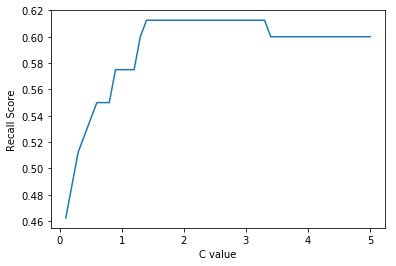

In [33]:
c_start = 0.1
c_end = 5
c_inc = 0.1

c_values, recall_scores = [], []

best_recall_value = 0
c_val = c_start
while(c_val < c_end):
    c_values.append(c_val)
    lr_model_obj = LogisticRegression(C = c_val, random_state = 42)
    lr_model_obj.fit(x_train, y_train.ravel())
    lr_model_loop = lr_model_obj.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_model_loop)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_value):
        best_recall_value = recall_score
        best_lr_model = lr_model_loop
    c_val = c_val + c_inc

best_c_value = c_values[recall_scores.index(best_recall_value)]
print("The maximum recall value, {0:0.3f} occured at {1:0.3f}".format(best_recall_value, best_c_value))

%matplotlib inline
plt.plot(c_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("Recall Score")
    

### Logestic regression with Class_weight = 'balanced'

The maximum recall value, 0.738 occured at 0.300


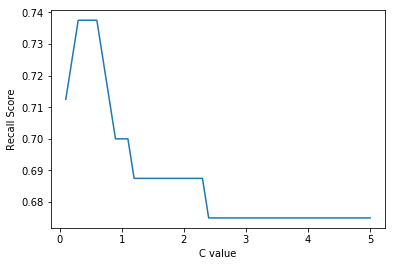

In [34]:
c_start = 0.1
c_end = 5
c_inc = 0.1

c_values, recall_scores = [], []

best_recall_value = 0
c_val = c_start
while(c_val < c_end):                           # the false cases are more. so the line shifts using the hyperparameter
    c_values.append(c_val)
    lr_model_obj = LogisticRegression(C = c_val, class_weight='balanced', random_state = 42) # class_weight, hyperparameter
    lr_model_obj.fit(x_train, y_train.ravel())
    lr_model_loop = lr_model_obj.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_model_loop)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_value):
        best_recall_value = recall_score
        best_lr_model = lr_model_loop
    c_val = c_val + c_inc

best_c_value = c_values[recall_scores.index(best_recall_value)]
print("The maximum recall value, {0:0.3f} occured at {1:0.3f}".format(best_recall_value, best_c_value))

%matplotlib inline
plt.plot(c_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("Recall Score")

In [35]:
from sklearn.linear_model import LogisticRegression
lr_model_f = LogisticRegression(class_weight = "balanced", C = best_c_value, random_state = 42)
lr_model_f.fit(x_train, y_train.ravel())
lr_predict = lr_model_f.predict(x_test)

print("Accuracy score: {0:0.4f}".format(metrics.accuracy_score(y_test, lr_predict)))
print("")
from sklearn import metrics
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict)))
print("")
print(metrics.classification_report(y_test, lr_predict, labels=[1, 0]))
print(metrics.recall_score(y_test, lr_predict))

Accuracy score: 0.7143

[[106  45]
 [ 21  59]]

             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231

0.7375


## LogisticRegressionCV
LogisticRegression + Cross_validation


It splits the training data into k-folds and use one fold as validation data in each loop. 
The best hyperparameter is the average of them.


In [38]:
from sklearn.linear_model import LogisticRegressionCV
lrcv_model = LogisticRegressionCV(n_jobs = -1, random_state = 42, Cs=3, cv=10, class_weight="balanced", refit=True)
lrcv_model.fit(x_train, y_train.ravel())


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [39]:

lrcv_test = lrcv_model.predict(x_test)

print("Accuracy score: {0:0.4f}".format(metrics.accuracy_score(y_test, lrcv_test)))
print("")
print("{0}".format(metrics.confusion_matrix(y_test, lrcv_test)))
print("")
print(metrics.classification_report(y_test, lrcv_test, labels=[1, 0]))
print(metrics.recall_score(y_test, lrcv_test))

Accuracy score: 0.6926

[[108  43]
 [ 28  52]]

             precision    recall  f1-score   support

          1       0.55      0.65      0.59        80
          0       0.79      0.72      0.75       151

avg / total       0.71      0.69      0.70       231

0.65
